In [1]:
import pandas as pd

FILE = 'datasets/migrant_deaths.csv'

In [3]:
df = pd.read_csv(FILE)
df.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Website Date', 'Incident year', 'Reported Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Region of Origin', 'Cause of Death', 'Country of Origin',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping', 'Article title',
       'Source Quality', 'URL'],
      dtype='object')

In [5]:
per_year_per_region = df.groupby(['Region of Origin', 'Incident year'])['Total Number of Dead and Missing'].sum().reset_index()
per_year_per_region

,Region of Origin,Incident year,Total Number of Dead and Missing
0,Caribbean,2014,75
1,Caribbean,2015,67
2,Caribbean,2016,130
3,Caribbean,2017,169
4,Caribbean,2018,28


In [10]:
!pip install matplotlib seaborn pandas

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/30/5b/a6214caaa5adf07b52aecba98fdace32cc51e63a1fcc1f98d60ec128a6c0/matplotlib-3.8.0-cp310-cp310-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fb/7f/c44a51a83a093bf5c84e07dd1e3cfe9f68c47b6499bd05a9de0c6dbdc2bc/contourpy-1.1.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/12/20/dd3ee8dd2bc4e6bfbcd3ad4d1d79e9dba0dc

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


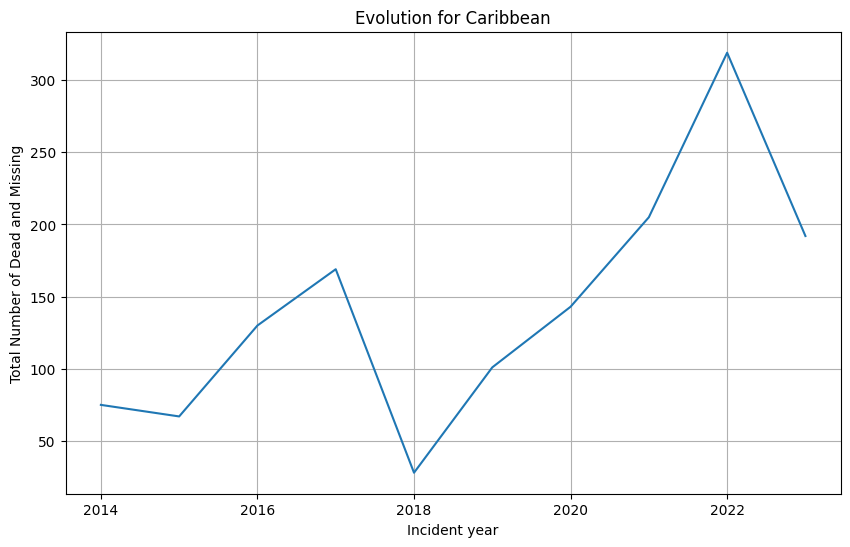

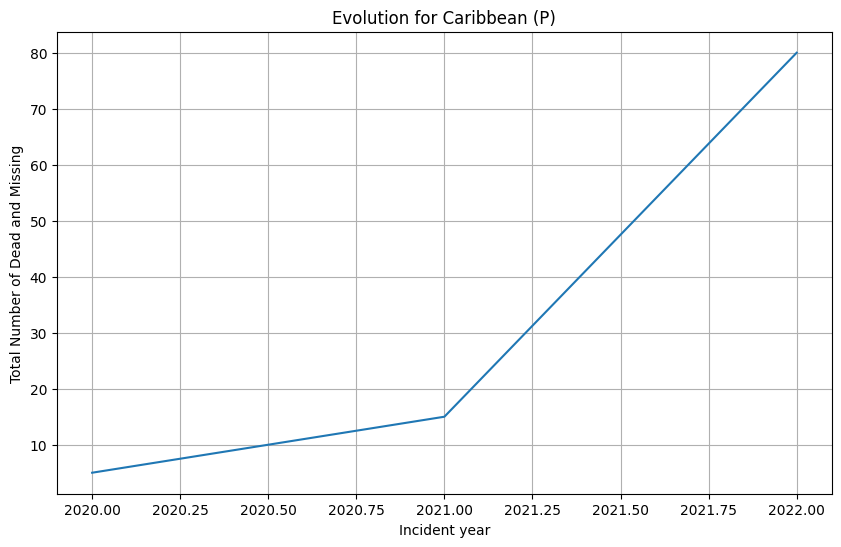

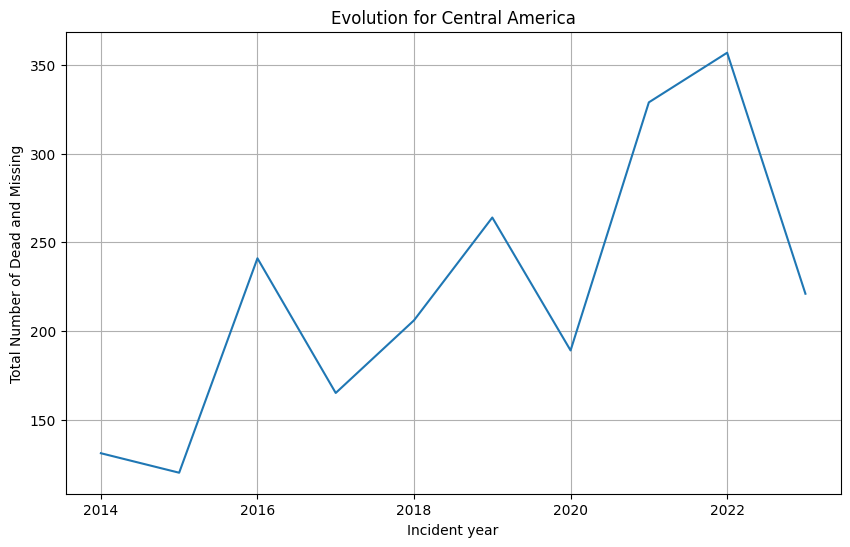

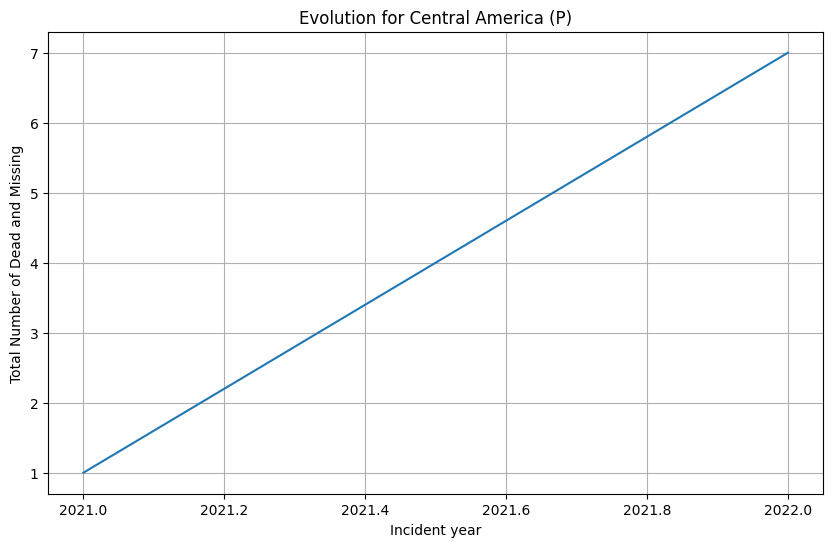

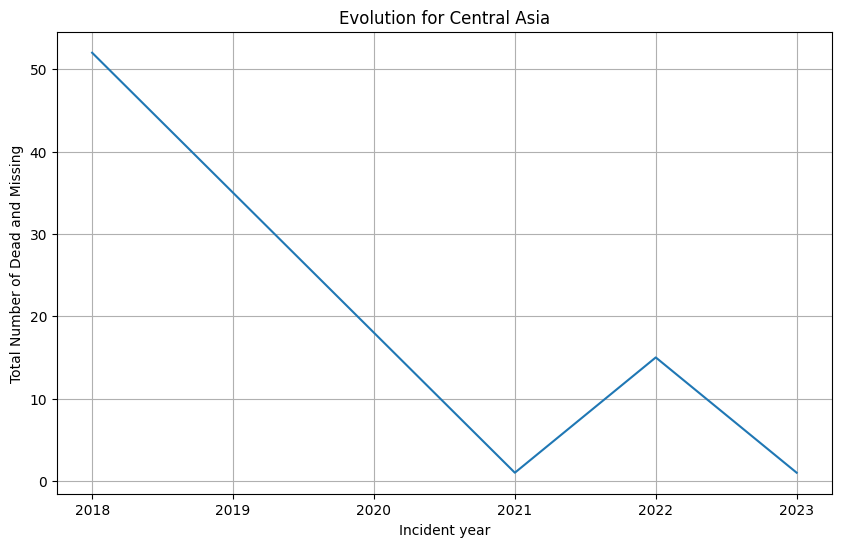

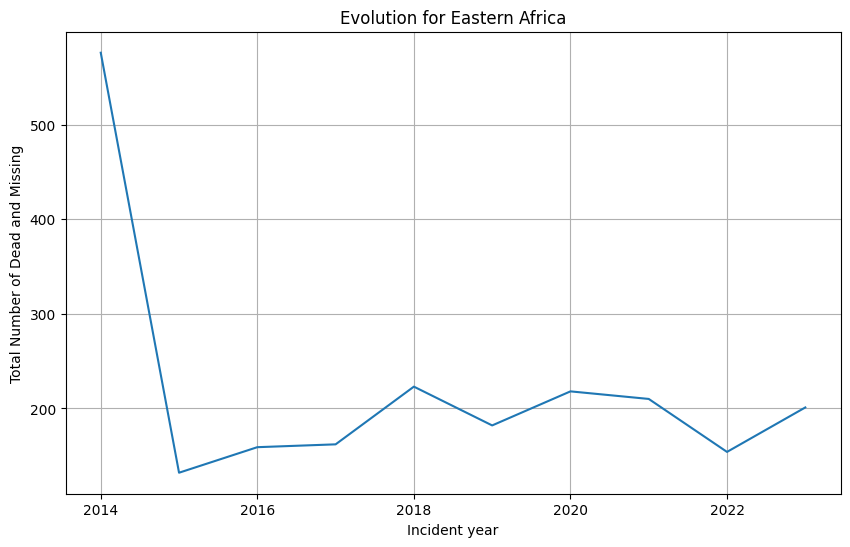

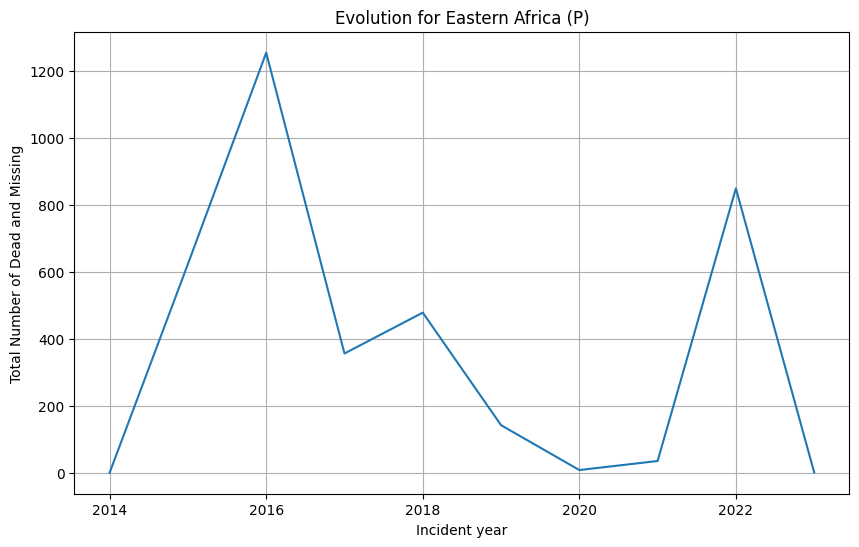

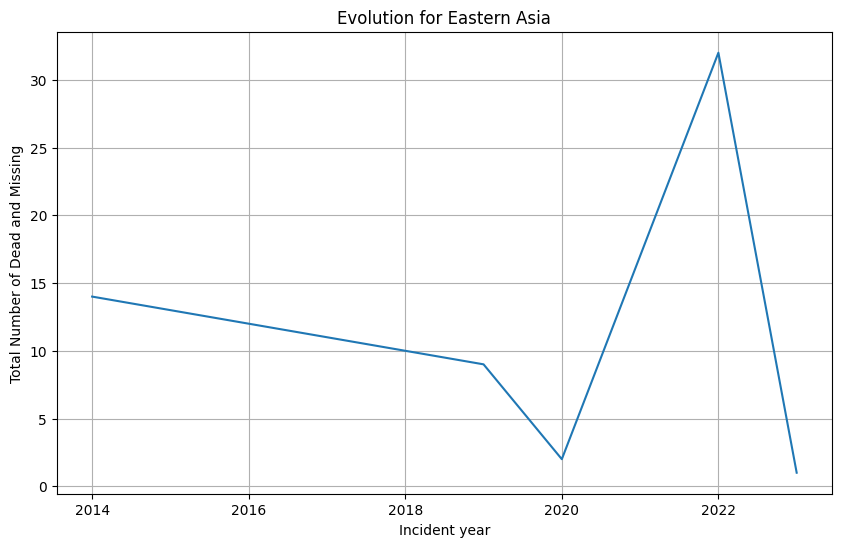

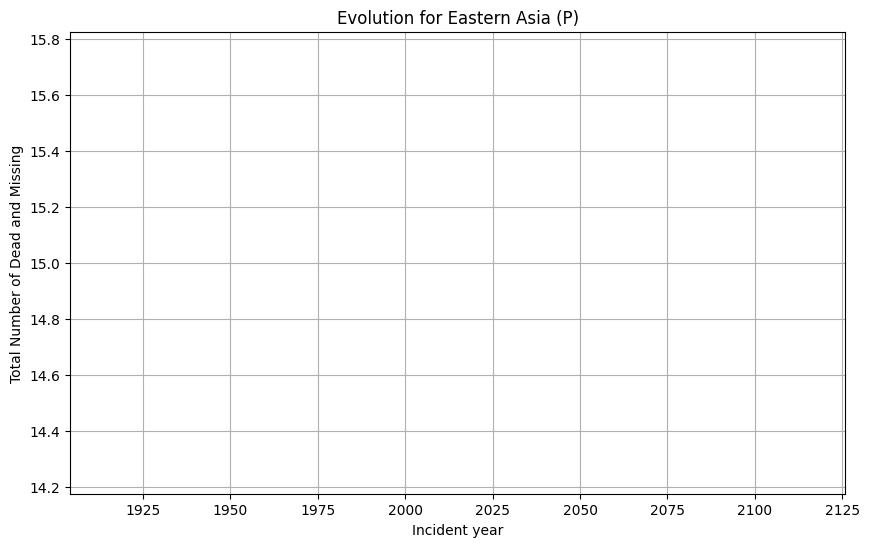

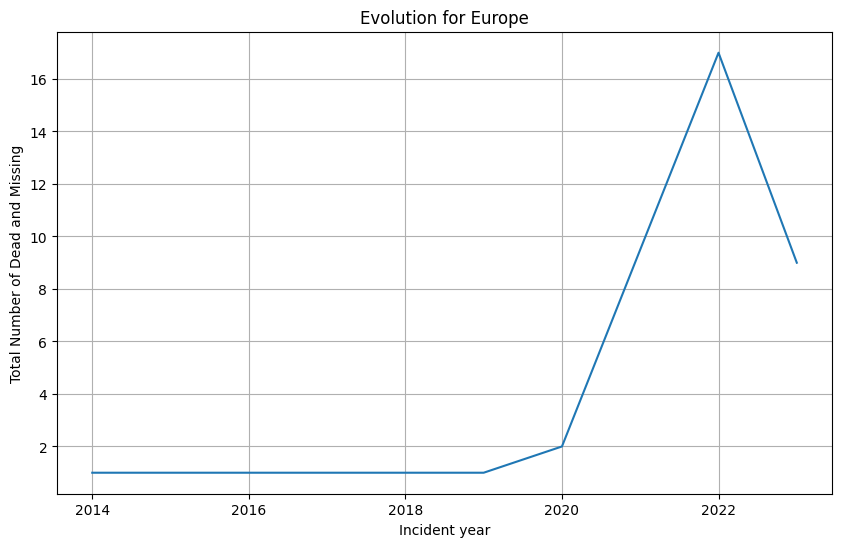

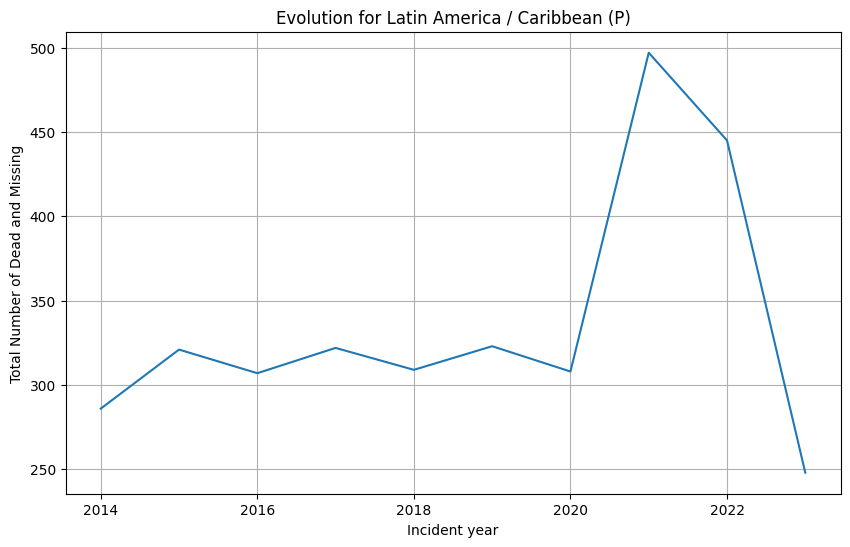

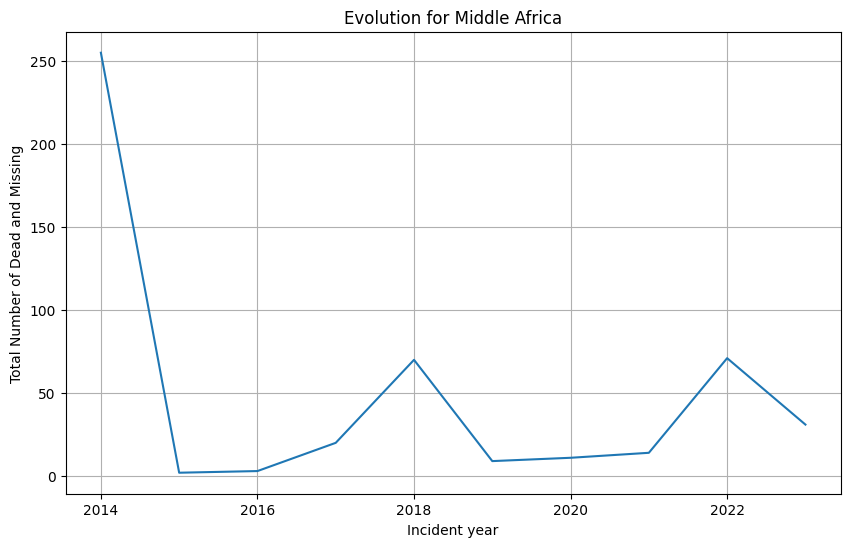

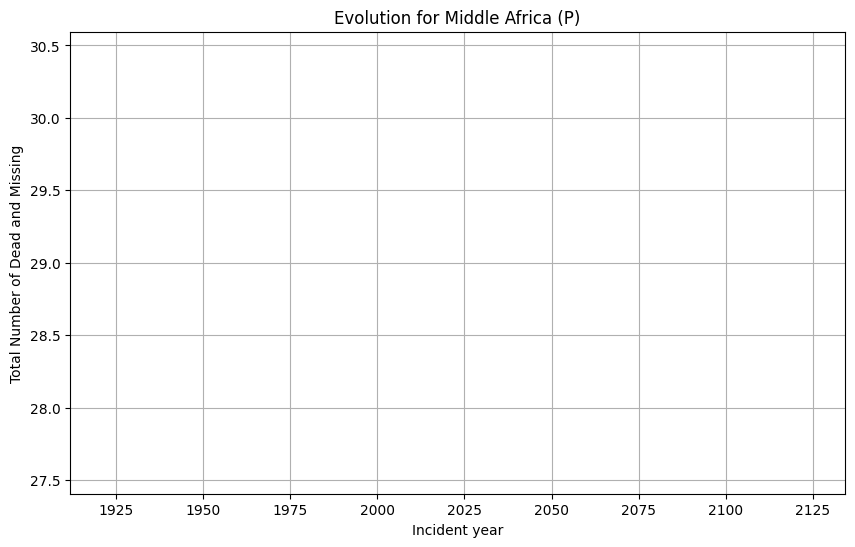

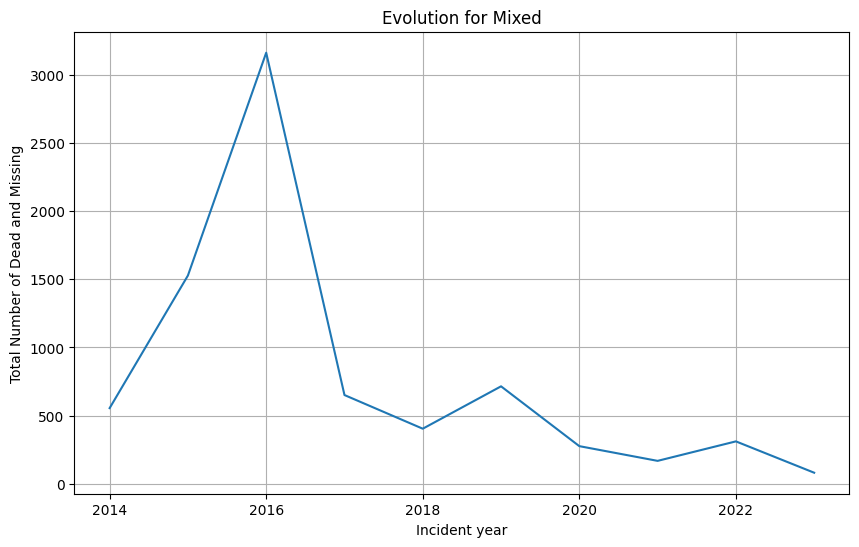

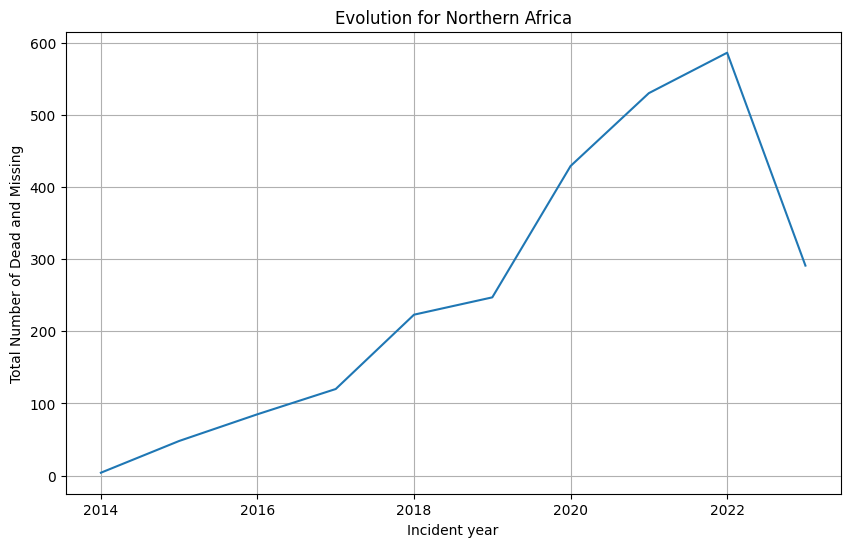

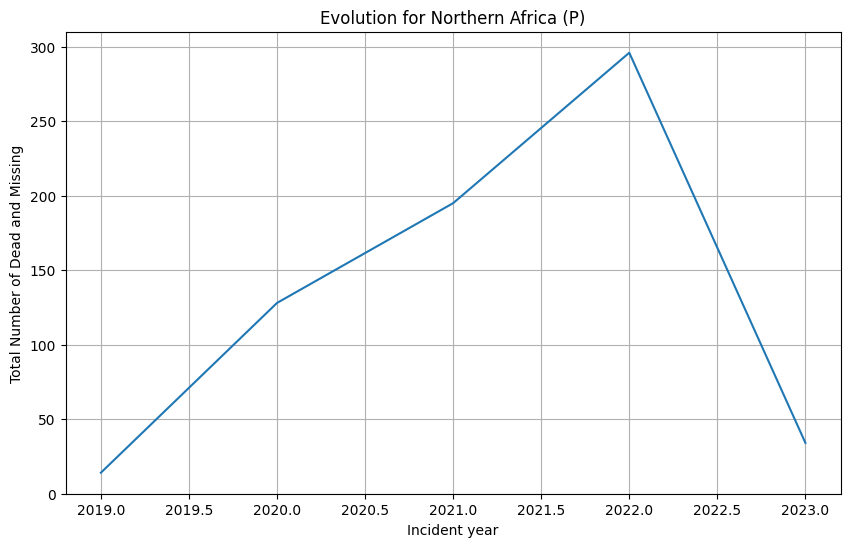

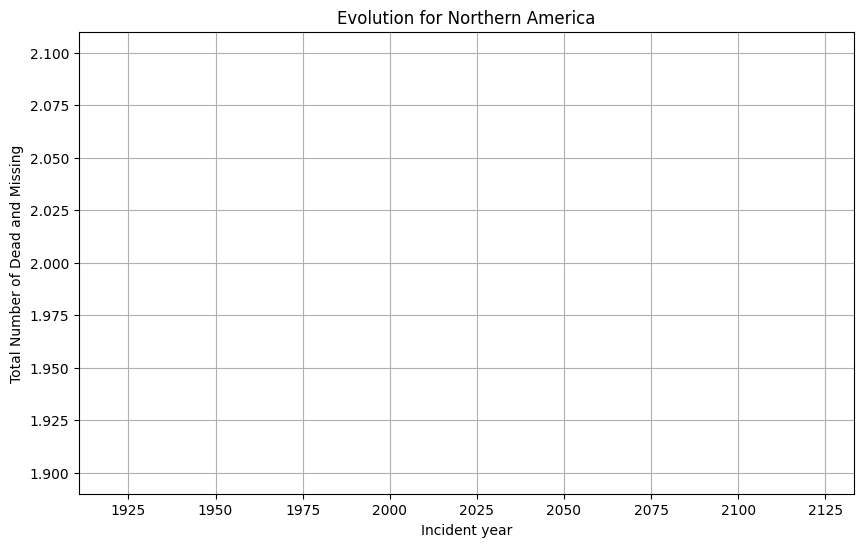

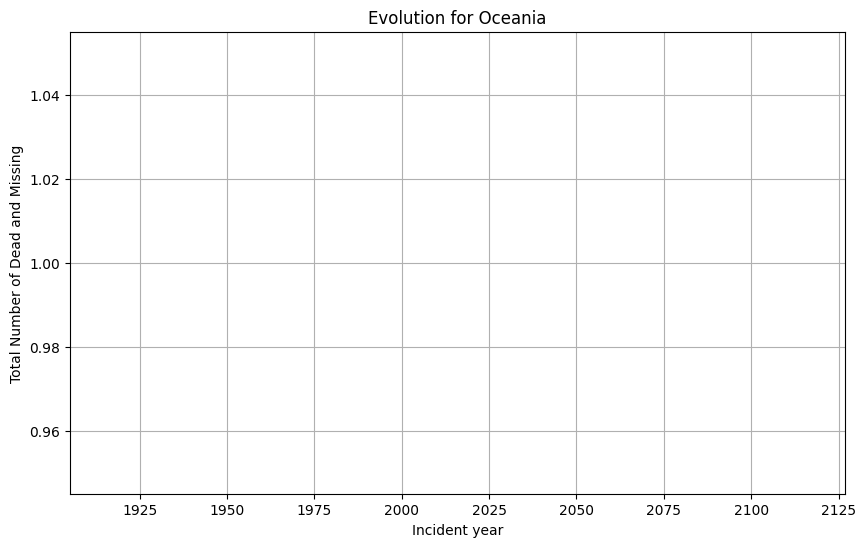

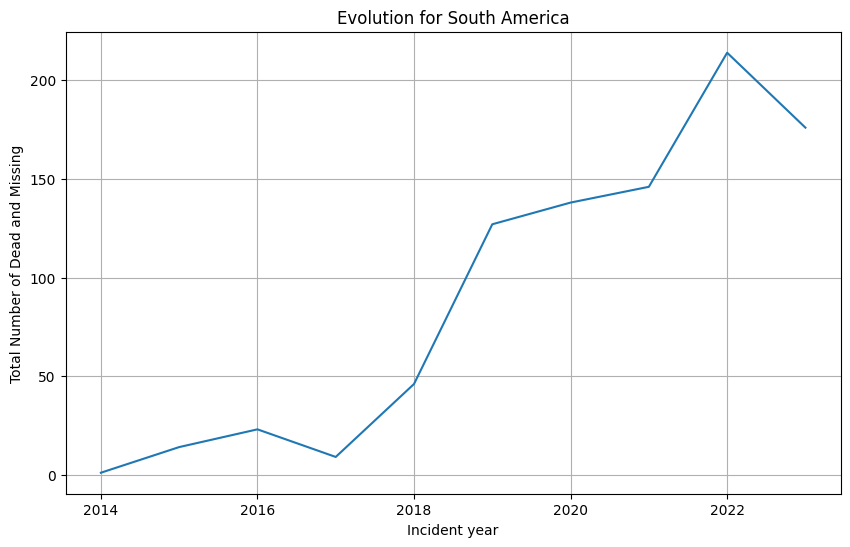

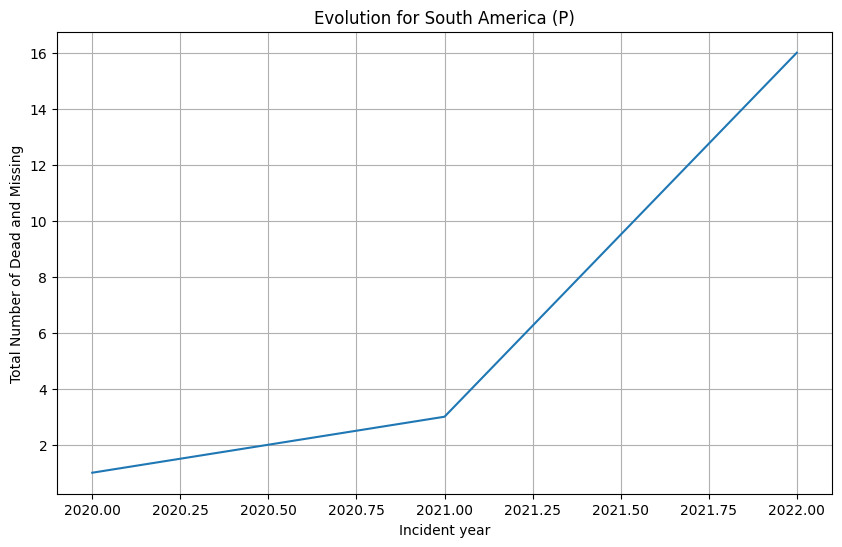

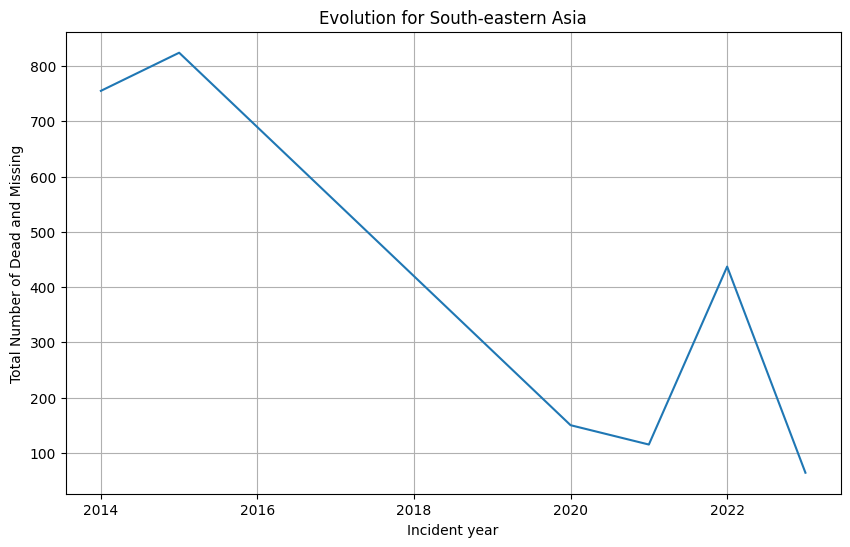

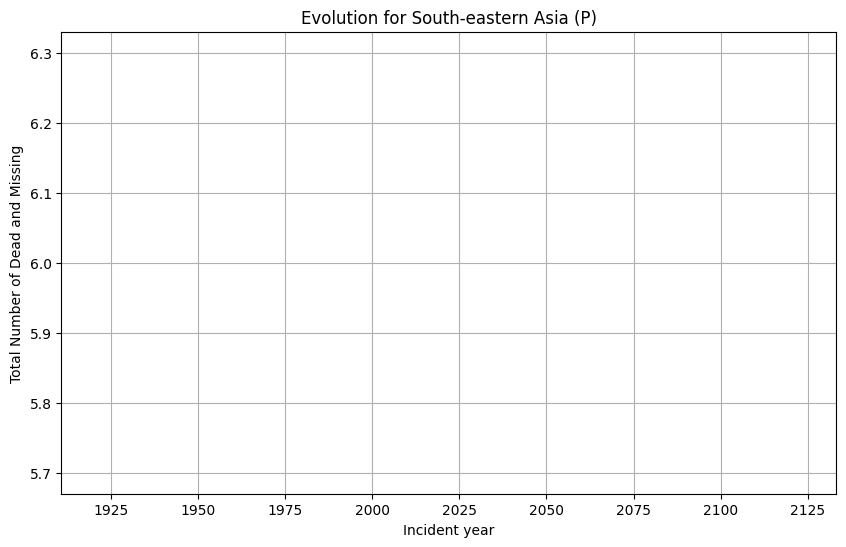

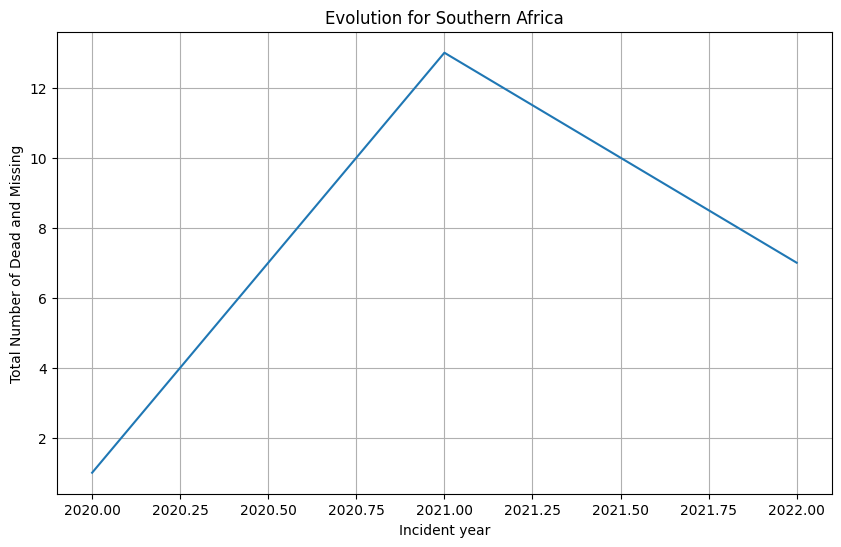

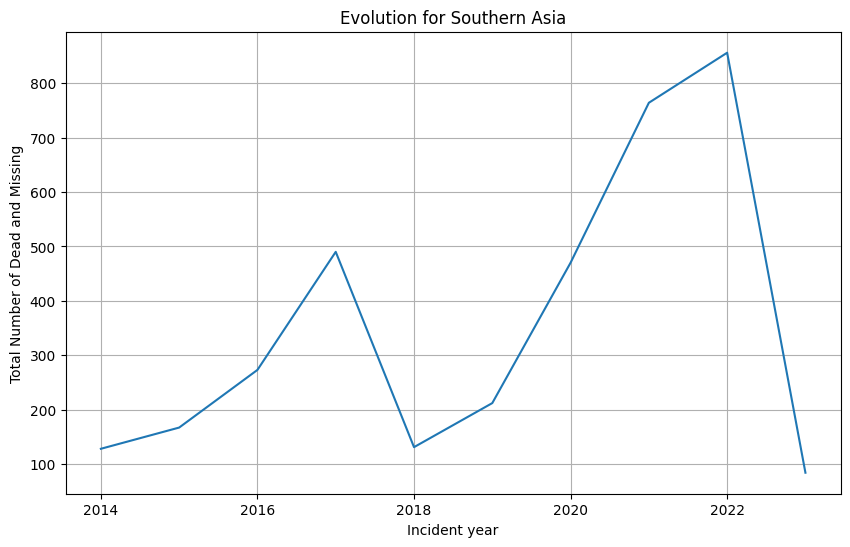

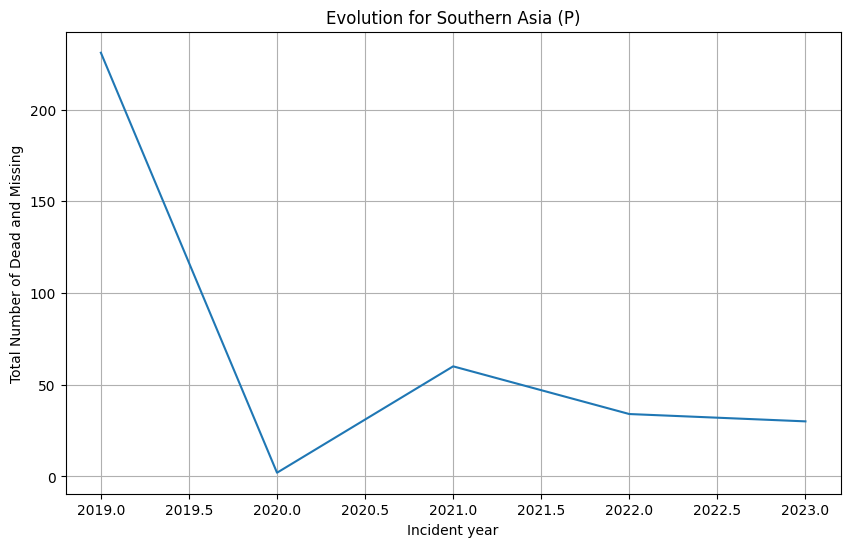

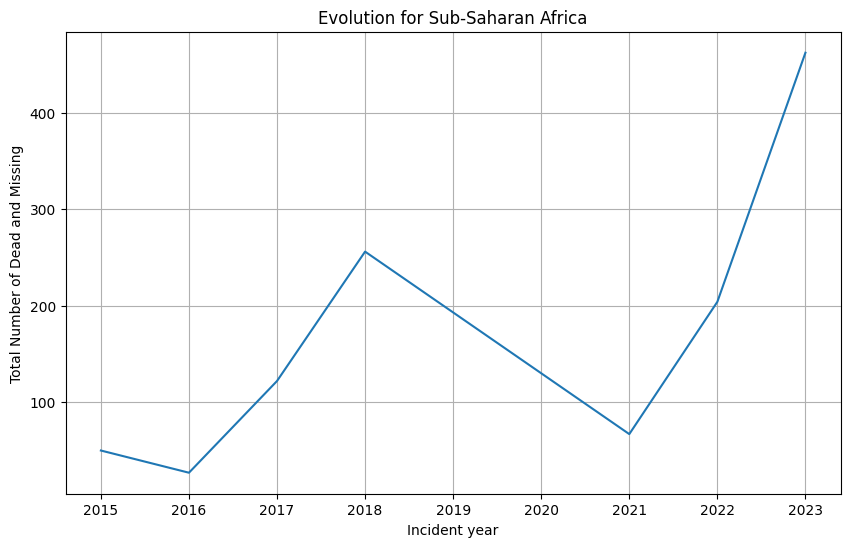

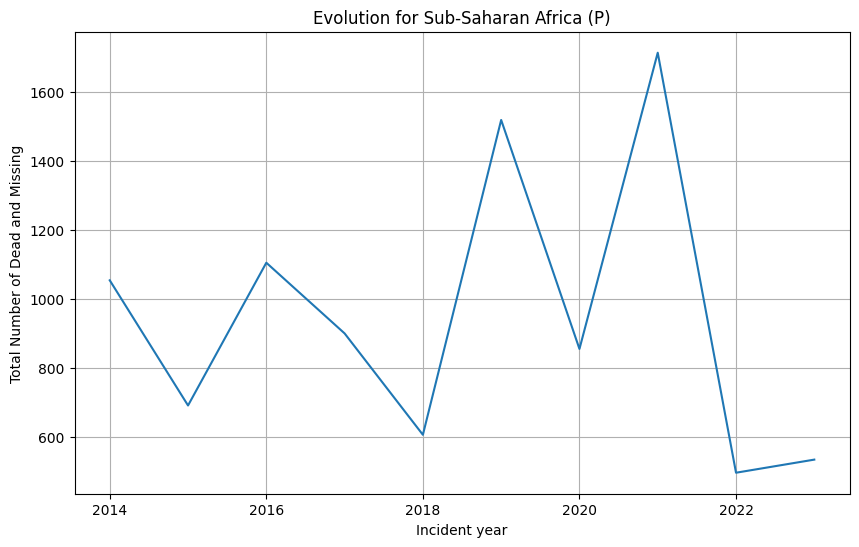

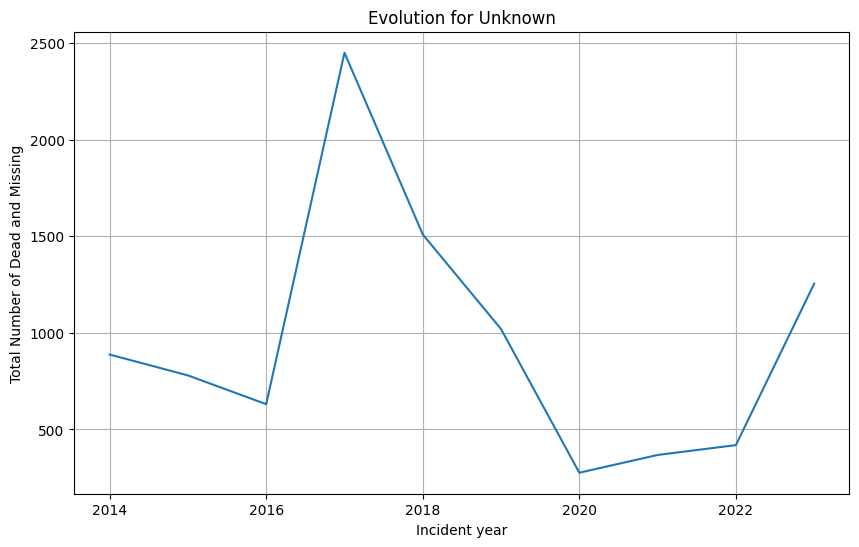

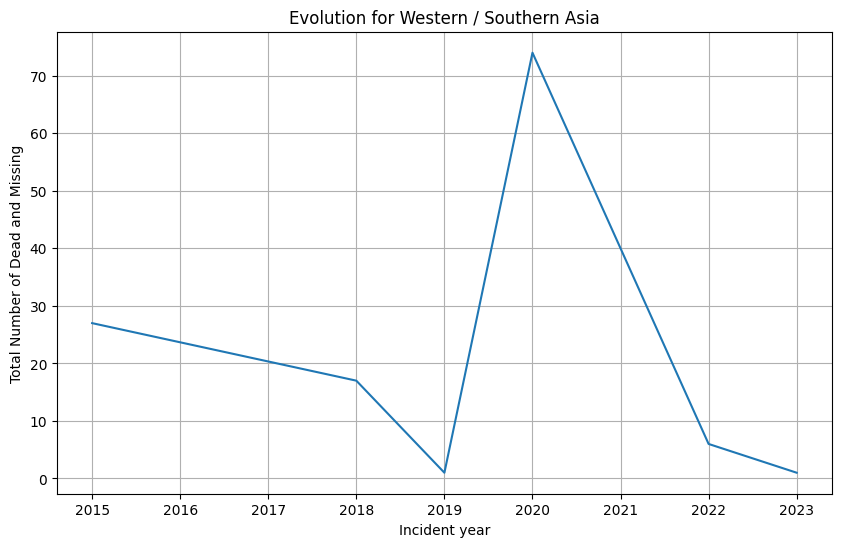

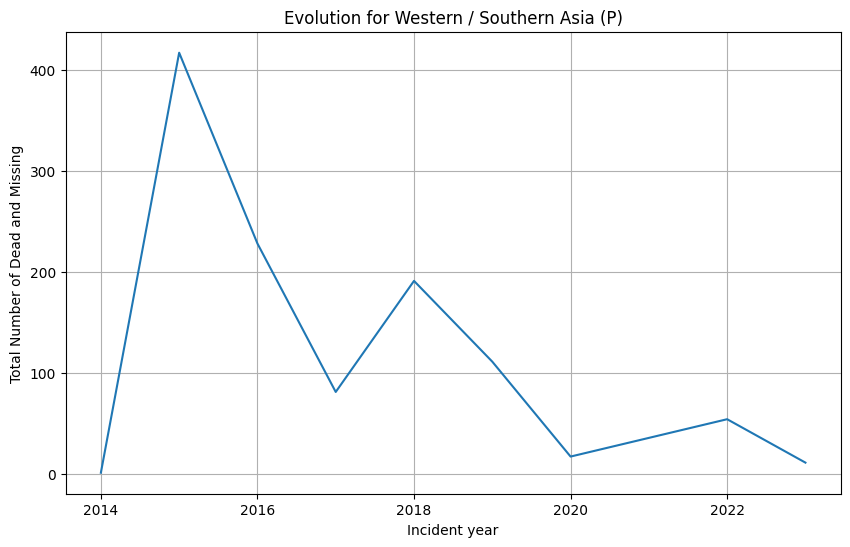

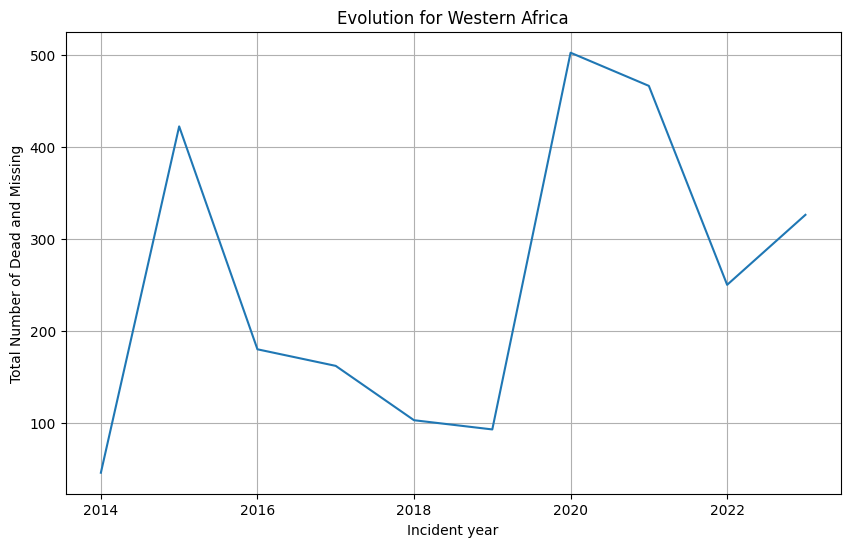

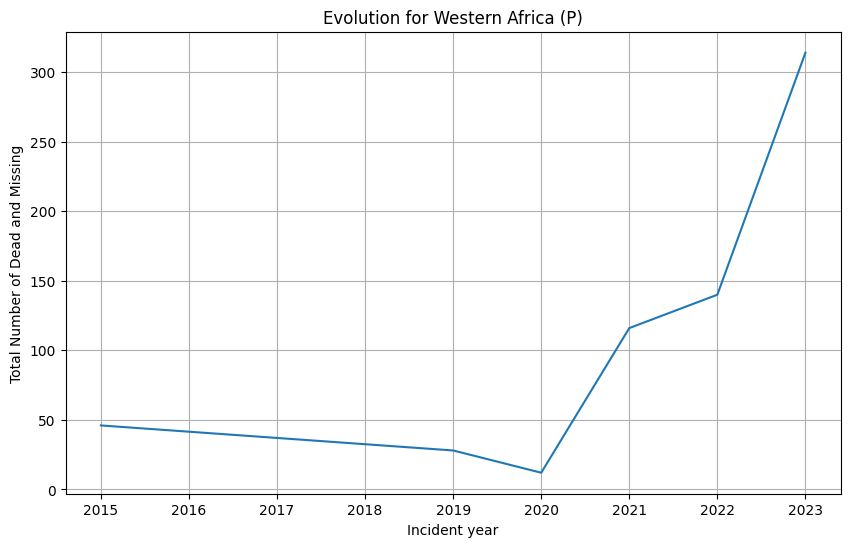

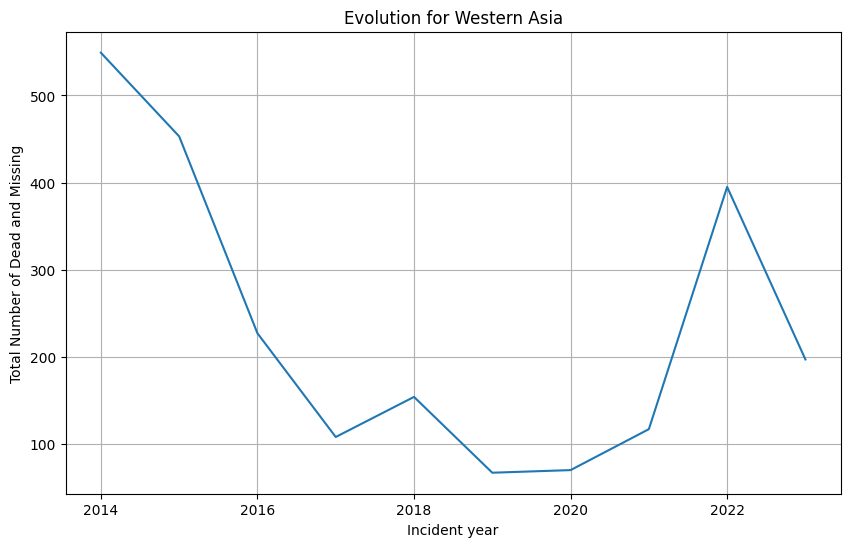

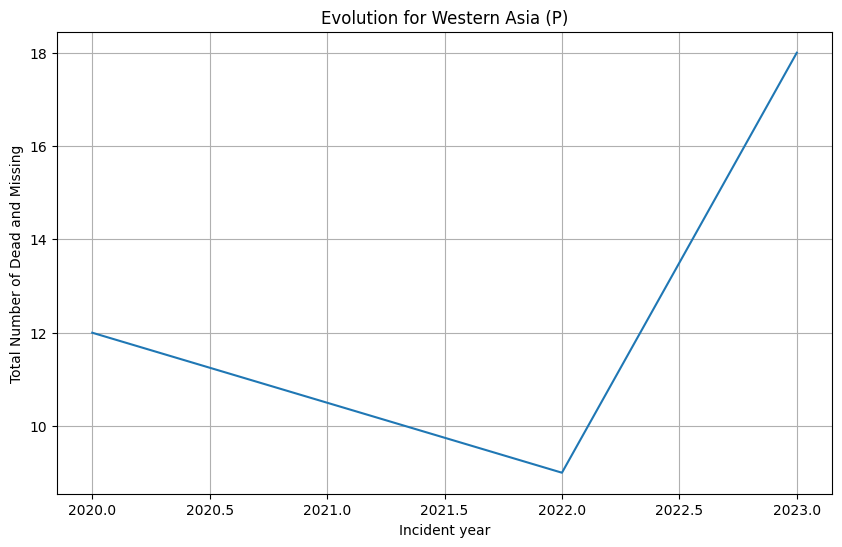

In [13]:
# Liste des régions uniques
regions = per_year_per_region['Region of Origin'].unique()

for region in regions:
    # Filtrer le DataFrame pour une région spécifique
    subset = per_year_per_region[per_year_per_region['Region of Origin'] == region]
    
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Incident year', y='Total Number of Dead and Missing', data=subset)
    plt.title(f"Evolution for {region}")
    plt.grid(True)
    plt.show()


In [15]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Liste des régions uniques
regions = per_year_per_region['Region of Origin'].unique()

# Créer un objet PDF pour sauvegarder les graphiques
with PdfPages('regions_evolution.pdf') as pdf:
    for region in regions:
        # Filtrer le DataFrame pour une région spécifique
        subset = per_year_per_region[per_year_per_region['Region of Origin'] == region]
        
        # Créer le graphique
        plt.figure(figsize=(10,6))
        sns.lineplot(x='Incident year', y='Total Number of Dead and Missing', data=subset)
        plt.title(f"Evolution for {region}")
        plt.grid(True)
        
        # Sauvegarder le graphique dans le PDF
        pdf.savefig()  
        plt.close()


In [17]:
per_year_per_region_incident = df.groupby(['Region of Incident', 'Incident year'])['Total Number of Dead and Missing'].sum().reset_index()

# Liste des régions uniques
regions = per_year_per_region_incident['Region of Incident'].unique()

with PdfPages('regions_evolution_incident.pdf') as pdf:
    for region in regions:
        subset = per_year_per_region_incident[per_year_per_region_incident['Region of Incident'] == region]
        
        plt.figure(figsize=(10,6))
        sns.lineplot(x='Incident year', y='Total Number of Dead and Missing', data=subset)
        plt.title(f"Evolution for {region}")
        plt.grid(True)
        
        pdf.savefig()  
        plt.close()

In [19]:
max_death_incidents = df.sort_values('Total Number of Dead and Missing', ascending=False)
max_death_incidents.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
401,2015.MMP00108,2015.MMP00108,Incident,Mediterranean,2015-04-18,2015,April,750.0,272.0,1022,...,Drowning,"Algeria,Bangladesh,Côte d'Ivoire,Egypt,Eritrea...",Central Mediterranean,"120 miles south of Lampedusa, 110 kilometers n...",Italian Navy via UNHCR,"35.03, 14.6777",Uncategorized,Migrant boat captain arrested as survivors of ...,5.0,http://bit.ly/1Oa2qYi
253,2014.MMP00259,2014.MMP00259,Cumulative Incident,South-eastern Asia,2014-12-31,2014,December,NaN,750.0,750,...,Mixed or unknown,Unknown,NaN,"Departed from Arakan, Myanmar. Vast majority g...",UNHCR,"14.60759586, 93.21449103",South-eastern Asia,Irregular Maritime Movements in South-Eastern ...,4.0,http://bit.ly/1G6YUEZ
12867,2023.MMP0412,2023.MMP0412,Incident,Mediterranean,2023-06-14,2023,June,84.0,512.0,596,...,Drowning,Unknown,Central Mediterranean,"Off the coast of Kalamata, Greece. After depar...",Survivor testimonies provided to IOM Greece an...,"36.18, 21.04",Uncategorized,NaN,5.0,https://archive.ph/gar12
1598,2016.MMP00485,2016.MMP00485,Incident,Mediterranean,2016-05-26,2016,May,133.0,417.0,550,...,Drowning,"Côte d'Ivoire,Eritrea,Gambia,Nigeria,Somalia,S...",Central Mediterranean,"35 nautical miles north of Zuwara, Libya","UNHCR, Associated Press, La Republica","33.050577, 12.059376",Uncategorized,Migrant boat capsizes off Libya's Mediterranea...,4.0,http://apne.ws/2jACOLi
199,2014.MMP00204,2014.MMP00204,Incident,Mediterranean,2014-09-12,2014,September,3.0,497.0,500,...,Drowning,"Egypt,Palestinian Territories,Sudan,Syrian Ara...",Central Mediterranean,Unspecified location between Libya and Italy,IOM Italy,"33.9069, 14.4141",Uncategorized,700 Migrants Feared Dead Following Two Shipwre...,4.0,http://bit.ly/YLO09p
